In [12]:
# pandas编码分类特征
import pandas as pd
from IPython.display import display

demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [16]:
demo_df['Integer Feature'].value_counts()  # 显示唯一值并统计出现次数

1    2
2    1
0    1
Name: Integer Feature, dtype: int64

In [14]:
pd.get_dummies(demo_df)  # 自动变换所有具有对象类型(比如字符串)的列或所有分类的列

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [18]:
# 为Interger Feature列创建虚拟变量
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)  # 将数值类型转换为str类型
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])  # 显示的指定列名

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


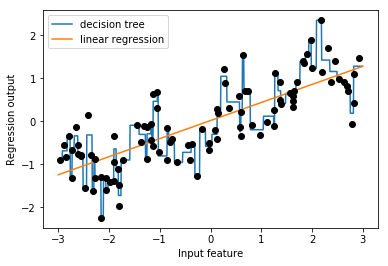

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dec_reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, dec_reg.predict(line), label='decision tree')

lin_reg = LinearRegression().fit(X, y)
plt.plot(line, lin_reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [25]:
# 使线性模型在连续数据上更强大就是使用特征分箱，使连续特征变成离散特征
bins = np.linspace(-3, 3, 11)  # 创建11个元素，从而创建10个箱子
which_bin = np.digitize(X, bins=bins)  # 记录每个数据点所属的箱子
print('Data points:\n{}'.format(X[:5]))
print('\nBin membership for data points:\n{}'.format(which_bin[:5]))

Data points:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [27]:
# 再将离散特征变成one-hot编码  one-hot编码只适合值为整数的离散特征
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_bin = encoder.transform(which_bin)
print(X_bin[:5])  # 这样X_bin就包含10个特征

c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


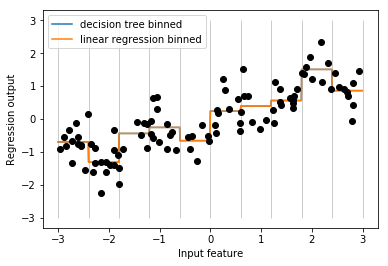

In [60]:
line_bin = encoder.transform(np.digitize(line, bins=bins))

dec_reg = DecisionTreeRegressor(min_samples_split=3).fit(X_bin, y)
plt.plot(line, dec_reg.predict(line_bin), label='decision tree binned')

lin_reg = LinearRegression().fit(X_bin, y)
plt.plot(line, lin_reg.predict(line_bin), label='linear regression binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [46]:
# 多项式特征
X_combined = np.hstack([X, X_bin])  # 每个箱子具有相同的斜率
print(X_combined.shape)
# 交互特征或乘积特征
X_product = np.hstack([X_bin, X * X_bin])  # 每个箱子具有不同的斜率
print(X_product.shape)

(100, 11)
(100, 20)


Text(0.5, 0, 'Input feature')

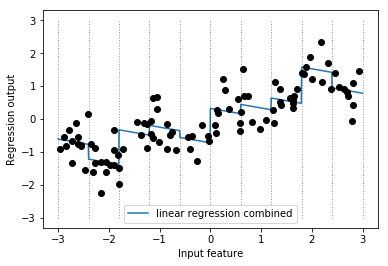

In [55]:
lin_reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_bin])
plt.plot(line, lin_reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':',linewidth=1, c='k', alpha=0.4)

plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')

In [71]:
# 多项式特征
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)  # include_bias默认True，表示添加恒等于1的常数特征
X_poly = poly.fit_transform(X)
print('X.shape:{}'.format(X.shape))
print('X_poly:{}'.format(X_poly.shape))
print('Polynomial feature name:\n{}'.format(poly.get_feature_names()))  # 每个特征的指数

X.shape:(100, 1)
X_poly:(100, 10)
Polynomial feature name:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


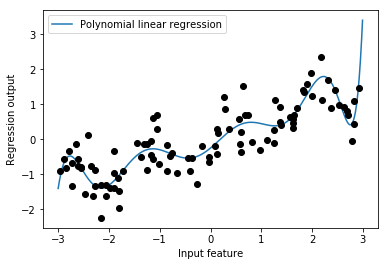

In [72]:
lin_reg = LinearRegression().fit(X_poly, y)
line_poly = poly.fit_transform(line)
plt.plot(line, lin_reg.predict(line_poly), label='Polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

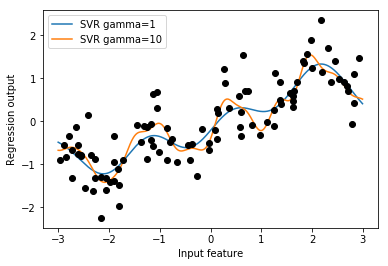

In [75]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [77]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 缩放数据
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

# 多项式特征和交互特征,次数最高为2
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('X_train shape:{}'.format(X_train.shape))
print('X_train_poly shape:{}'.format(X_train_poly.shape))
print('Polynomial features names:\n{}'.format(poly.get_feature_names()))

X_train shape:(379, 13)
X_train_poly shape:(379, 105)
Polynomial features names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x1

In [79]:
# 比较Ridge在有交互特征和没有的情况下的性能对比
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions:{:.4f}'.format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interactions:{:.4f}'.format(ridge.score(X_test_poly, y_test)))

Score without interactions:0.6215
Score with interactions:0.7535


In [80]:
# 比较随机森林在有交互特征和没有的情况下的性能对比
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor().fit(X_train_scaled, y_train)
print('Score without interactions:{:.4f}'.format(rf_reg.score(X_test_scaled, y_test)))
rf_reg = RandomForestRegressor().fit(X_train_poly, y_train)
print('Score with interactions:{:.4f}'.format(rf_reg.score(X_test_poly, y_test)))

Score without interactions:0.7904
Score with interactions:0.7330


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print('X.shape:{}'.format(X.shape))
print(np.bincount(X[:, 0]))

X.shape:(1000, 3)
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0, 0.5, 'value')

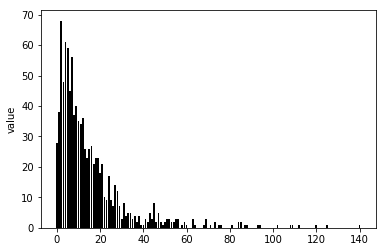

In [93]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='k')
plt.ylabel('Number of appearances')
plt.ylabel('value')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Ridge score without log:{:.4f}'.format(score))

Ridge score without log:0.6224


Text(0, 0.5, 'Value')

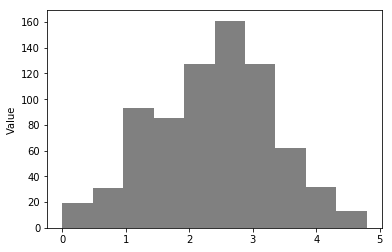

In [110]:
# 单变量非线性变换
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:, 0], bins=10, color='gray')
plt.ylabel('Number of appearances')
plt.ylabel('Value')

In [113]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Ridge score with log:{:.4f}'.format(score))

Ridge score with log:0.8749


In [125]:
# 自动化特征选择
# 单变量统计，  0个模型选择特征
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile  # 还有SelectKBest

cancer = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 向数据中添加噪声特征
X_noise = np.hstack([cancer.data, noise])  # 前30个特征来自数据集，后50个是噪声特征

X_train, X_test, y_train, y_test = train_test_split(X_noise, cancer.target, random_state=0, test_size=.5)
select = SelectPercentile(percentile=50)  # 选择50%的特征
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)  # 对数据集进行变换
print('X_train shape:{}'.format(X_train.shape))
print('X_train_selected shape:{}'.format(X_train_selected.shape))

X_train shape:(284, 80)
X_train_selected shape:(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

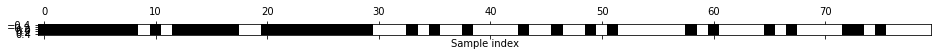

In [145]:
mask = select.get_support()  # 返回被选中的特征的布尔遮罩
print(mask)
# 将遮罩可视化，黑色为True， 白色为False,cmap='gray'时相反
plt.matshow(mask.reshape(1, -1), cmap='gray_r')  # 没有cmap时黄色为True，紫色为False
plt.xlabel('Sample index')

In [135]:
# 对选择的特征和原特征进行比较
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score with all feature:{:.4f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('Score with only select feature:{:.4f}'.format(lr.score(X_test_selected, y_test)))

Score with all feature:0.9298
Score with only select feature:0.9404


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
# 基于模型的特征选择,  单个模型选择特征
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')  # 以median为阈值，选择一半的特征
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print('X_train shape:{}'.format(X_train.shape))
print('X_train_selected shape:{}'.format(X_train_selected.shape))

X_train shape:(284, 80)
X_train_selected shape:(284, 40)


Text(0.5, 0, 'Sample index')

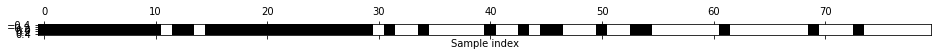

In [147]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [149]:
X_test_selected = select.transform(X_test)
score = LogisticRegression().fit(X_train_selected, y_train).score(X_test_selected, y_test)
print('Score with SelectFromModel:{:.4f}'.format(score))  # 可以看到SelectFromModel比SelectPercentile要好

Score with SelectFromModel:0.9509


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'sample index')

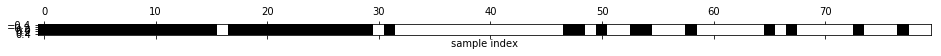

In [151]:
# 迭代特征选择，  多个模型选择特征
from sklearn.feature_selection import RFE  # 递归特征消除
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
# 将选择的特征可视化
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('sample index')

In [156]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('score with rfe:{:.4f}'.format(score))

score with rfe:0.9509


c:\users\lxg\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [161]:
# 专家知识
citibike = mglearn.datasets.load_citibike()
print('type of citibike:{}'.format(type(citibike)))
print(citibike.head())

type of citibike:<class 'pandas.core.series.Series'>
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

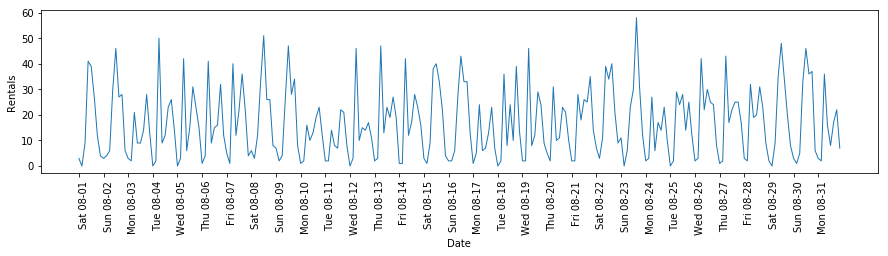

In [179]:
plt.figure(figsize=(15, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')

plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [196]:
y = citibike.values  # 提取目标值（租车数量）
X = citibike.index.strftime('%s').astype('int').reshape(-1, 1)  # 利用‘%s’将时间转换为POSIX时间

n_train = 184 # 将184个数据点用于训练


def eval_on_features(features, target, regressor):
    # 划分数据集
    X_train, X_test = features[:n_train], features[n_train:]  
    y_train, y_test = target[:n_train], target[:n_train]
    
    regressor.fit(X_train, y_train)
    print('test set score:{:.4f}'.format(regressor.score(X_test, y_test)))
    y_test_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(x), 8), xticks.strftime('%a %m-%d'), rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train, y_train_pred), '--', label='prediction train')
    plt.plot(range(n_test, len(y_test)+n_train), y_test_pred, '--', label='prediction test')
    plt.legend(loc=(1.01, 0.3))
    plt.xlabel('Date')
    plt.ylabel('Rentals')

TypeError: Cannot cast Index to dtype int